In [60]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [61]:
data = pd.read_csv('clean.csv')

In [63]:
data.describe()

,CustomerDOB,CustGender,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,901358.000000,901358.000000,9.013580e+05,901358.000000,901358.000000,9.013580e+05
mean,1986.972672,0.723298,8.173280e+04,29.631584,15.464395,1.298540e+03
std,5.512324,0.447368,3.981005e+05,11.804388,5.162824,5.475934e+03
min,1973.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000e+00
25%,1983.000000,0.000000,4.268000e+03,23.000000,12.000000,1.480000e+02
50%,1988.000000,1.000000,1.479800e+04,33.000000,16.000000,4.000000e+02
75%,1991.000000,1.000000,4.750900e+04,36.000000,20.000000,1.020000e+03
max,2020.000000,1.000000,4.316556e+07,49.000000,23.000000,1.560035e+06


# Con librerias

c:\users\juanc\appdata\local\programs\python\python38\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


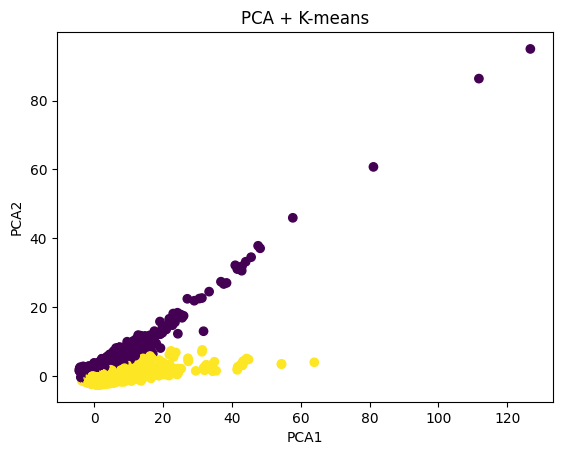

1377135.3807808578


In [122]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# crear un objeto PCA con el número de componentes principales que desees
pca = PCA(n_components=2)

# crear un objeto K-means con el número de clusters que desees
kmeans = KMeans(n_clusters=2)

# crear un pipeline que primero aplique PCA y luego K-means
pipeline = Pipeline([('pca', pca), ('kmeans', kmeans)])

# ajustar el pipeline al conjunto de datos
pipeline.fit(data_scaled)

# obtener las etiquetas de los clusters asignados por K-means
labels = pipeline.predict(data_scaled)

# obtener las coordenadas de las componentes principales
components = pipeline.named_steps['pca'].transform(data_scaled)

# graficar los puntos coloreados por cluster
plt.scatter(components[:, 0], components[:, 1], c=labels)
plt.title('PCA + K-means')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

inertia = kmeans.inertia_

print(inertia)

# Sin Librerias

In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def kmeans(df, k, num_iterations):
    # Selecciona k centroides iniciales al azar
    centroids = df.sample(k).values

    # Itera el algoritmo
    for i in range(num_iterations):
        # Calcula la distancia euclidiana entre cada punto y cada centroide
        distances = np.sqrt(((df.values - centroids[:, np.newaxis])**2).sum(axis=2))

        # Asigna cada punto al centroide más cercano
        labels = np.argmin(distances, axis=0)

        # Actualiza los centroides como el promedio de los puntos asignados a él
        for j in range(k):
            centroids[j] = np.mean(df[labels == j], axis=0)

    # Calcula la inercia
    inertia = ((df.values - centroids[:, np.newaxis])**2).sum()
            
    # Retorna las etiquetas finales y los centroides finales
    return labels, centroids, inertia


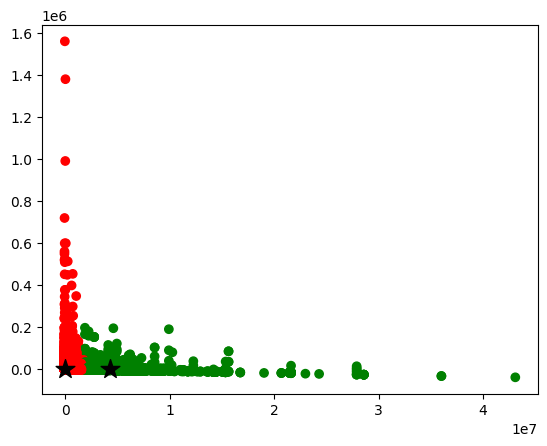

1.6470513515512695e+19


In [118]:
# Genera datos de ejemplo
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca.fit(data)

# Transformar los datos originales en la matriz de componentes principales
X_pca = pca.transform(data)
df_pca = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

X_pca.shape

# Aplica k-means
labels, centroids, inertia = kmeans(df_pca, k=2, num_iterations=10)

fig, ax = plt.subplots()
colors = ['red', 'green', 'blue']
ax.scatter(df_pca['PC1'], df_pca['PC2'], c=[colors[label] for label in labels])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='black')
plt.show()
print(inertia)
